In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train_ctrUa4K.csv')

In [3]:
test = pd.read_csv('test_lAUu6dG.csv')

In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
train.shape

(614, 13)

In [8]:
test.shape

(367, 12)

In [9]:
train['Loan_Status'].value_counts()
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

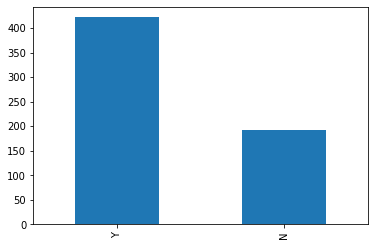

In [10]:
train['Loan_Status'].value_counts().plot.bar()

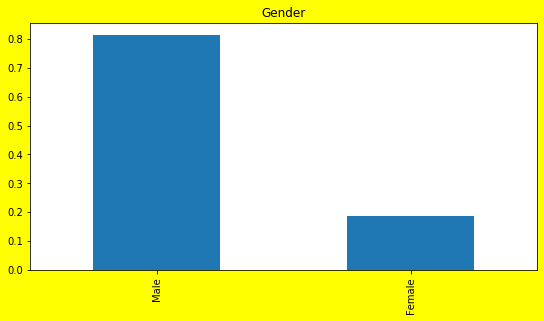

In [11]:
plt.figure(1,facecolor = 'yellow',edgecolor = 'pink')
plt.subplot(221) 
train['Gender'].value_counts(normalize = True).plot.bar(figsize =(20,10),title ='Gender')

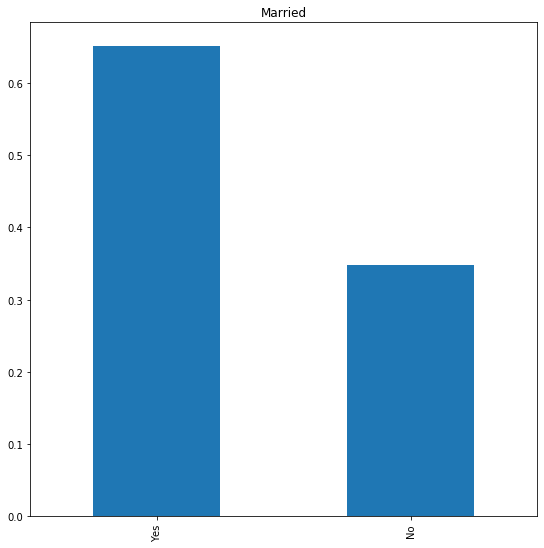

In [12]:
plt.subplot(222) 
train['Married'].value_counts(normalize = True).plot.bar(figsize=(20,20),title ='Married') 

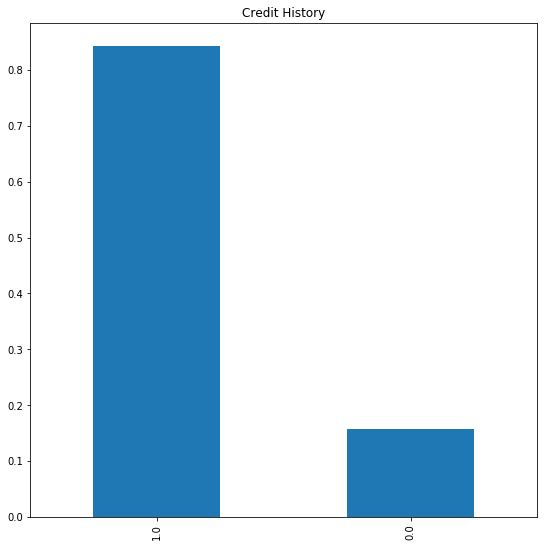

In [13]:
plt.subplot(223) 
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize = (20,20),title ='Credit History')

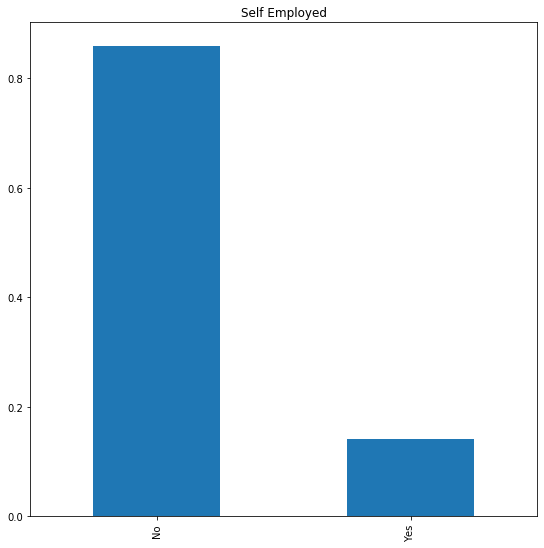

In [14]:
plt.subplot(222) 
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize =(20,20),title ='Self Employed')

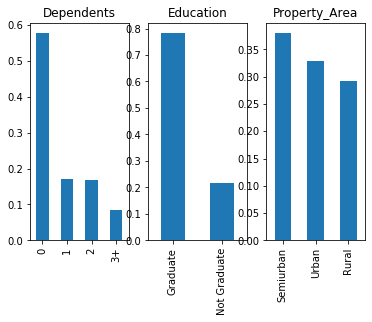

In [15]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(title ='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize = True).plot.bar(title ='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize = True).plot.bar(title ='Property_Area')
plt.show()

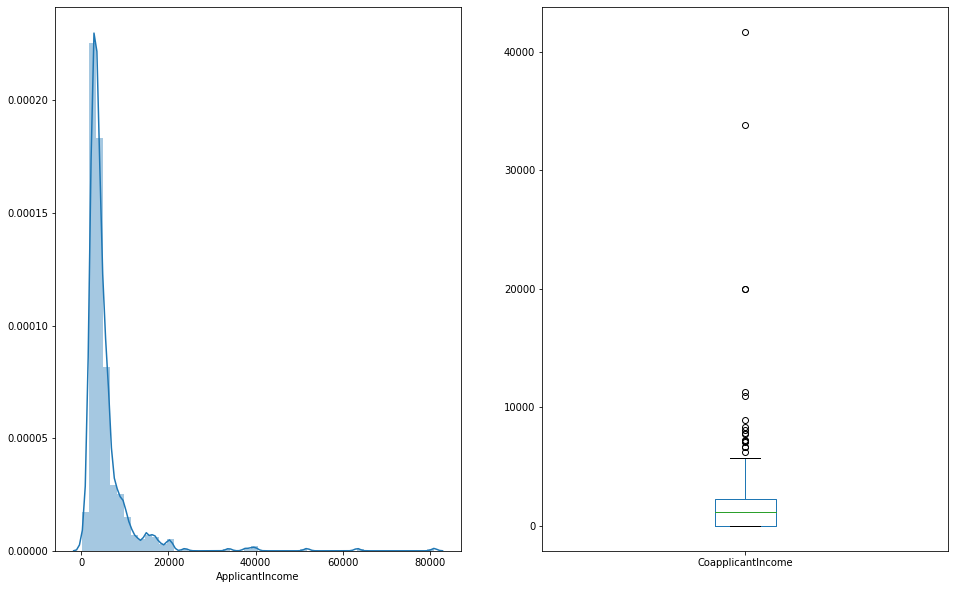

In [16]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome'])
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize =(16,10))

Text(0.5, 0.98, '')

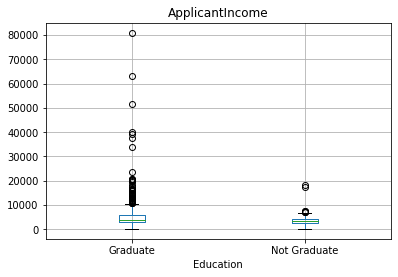

In [17]:
train.boxplot(column ='ApplicantIncome',by ='Education')
plt.suptitle('')


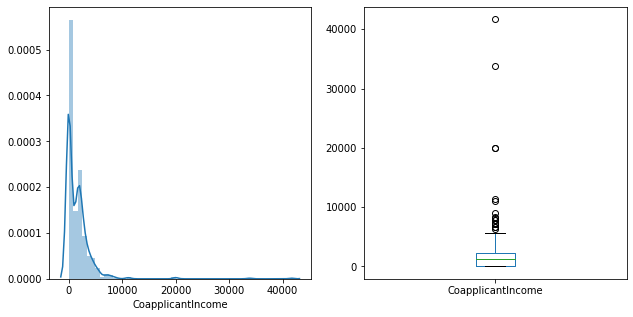

In [18]:
plt.figure(1)
plt.subplot(131)
sns.distplot(train['CoapplicantIncome'])
plt.subplot(132)
train['CoapplicantIncome'].plot.box(figsize =(16,5))

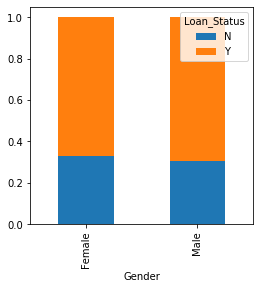

In [19]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))

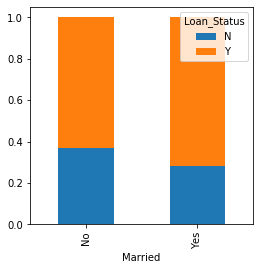

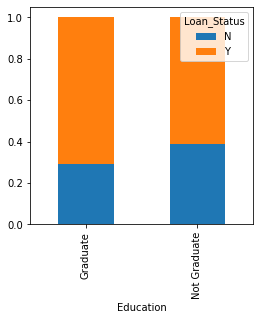

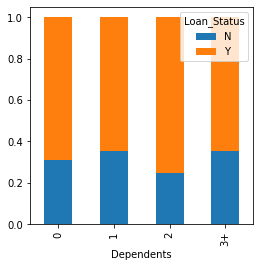

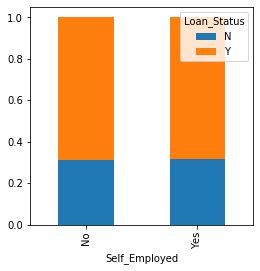

In [20]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))
Education.div(Education.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))
plt.show()

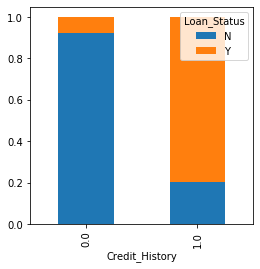

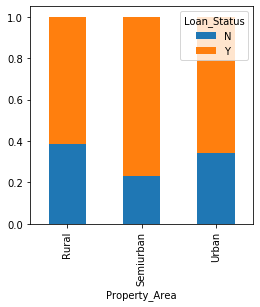

In [21]:
Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))
Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))

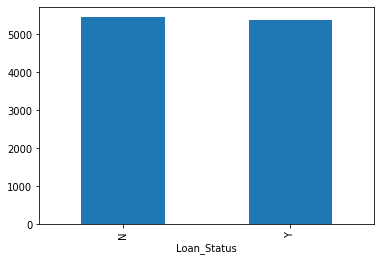

In [22]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [23]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Income_bin'] = pd.cut(train['ApplicantIncome'],bins,labels=group)

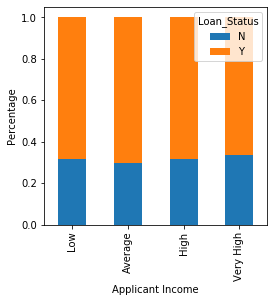

In [24]:
Income_bin = pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))
plt.xlabel('Applicant Income')
P = plt.ylabel('Percentage')

In [25]:
bins = [0,1000,3000,42000]
group = ['Low','Average','High']
train['CoapplicantIncome_bin'] = pd.cut(train['CoapplicantIncome'],bins,labels=group)

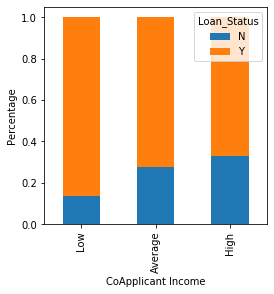

In [26]:
CoapplicantIncome_bin = pd.crosstab(train['CoapplicantIncome_bin'],train['Loan_Status'])
CoapplicantIncome_bin.div(CoapplicantIncome_bin.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))
plt.xlabel('CoApplicant Income')
P = plt.ylabel('Percentage')

In [27]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [28]:
bins = [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['TotalIncome_bin'] = pd.cut(train['Total_Income'],bins,labels=group)

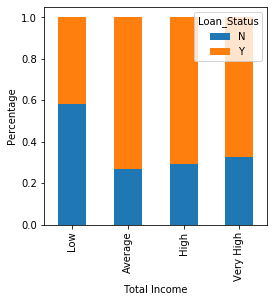

In [29]:
TotalIncome_bin = pd.crosstab(train['TotalIncome_bin'],train['Loan_Status'])
TotalIncome_bin.div(TotalIncome_bin.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))
plt.xlabel('Total Income')
P = plt.ylabel('Percentage')

In [30]:
bins = [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin'] = pd.cut(train['LoanAmount'],bins,labels=group)

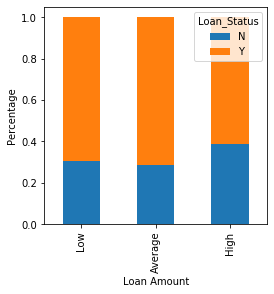

In [31]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float),axis =0).plot(kind ='bar',stacked=True,figsize=(4,4))
plt.xlabel('Loan Amount')
P = plt.ylabel('Percentage')

In [32]:
train = train.drop(['LoanAmount_bin','TotalIncome_bin','CoapplicantIncome_bin','Income_bin','Total_Income'],axis=1)

In [33]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status'].replace('N',0,inplace=True)
train['Loan_Status'].replace('Y',1,inplace=True)

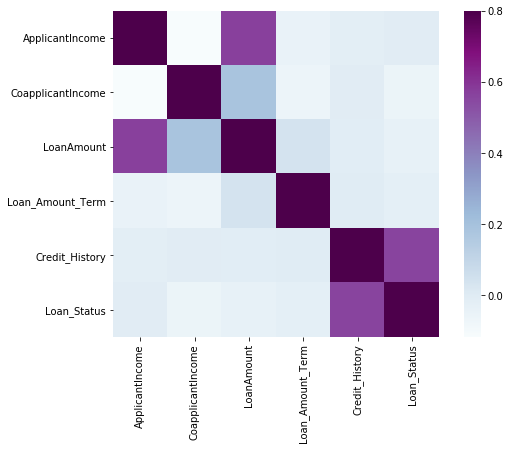

In [34]:
matrix=train.corr()
f,ax = plt.subplots(figsize = (9,6))
sns.heatmap(matrix,vmax = 0.8,square =True,cmap='BuPu')

In [35]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [37]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [39]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [40]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [41]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Married'].fillna(train['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [42]:
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

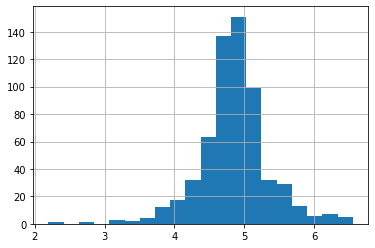

In [44]:
train['LoanAmount_Log']= np.log(train['LoanAmount'])
train['LoanAmount_Log'].hist(bins=20)
test['LoanAmount_Log']= np.log(test['LoanAmount'])

In [46]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

In [61]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [62]:
X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y,test_size = 0.3)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
pred_cv = model.predict(x_cv)

In [66]:
accuracy_score(y_cv,pred_cv)

0.8

In [67]:
pred_test = model.predict(test)

In [69]:
submission = pd.read_csv('sample_submission_49d68Cx.csv')

In [70]:
submission['Loan_Status']=pred_test

In [71]:
submission['Loan_ID']=test_original['Loan_ID']

In [74]:
submission['Loan_Status'].replace(0,'N',inplace = True)
submission['Loan_Status'].replace(1,'Y',inplace = True)

In [76]:
pd.DataFrame(submission, columns =['Loan_ID','Loan_Status']).to_csv('Logistic.csv')